In [3]:
from fit_model import *

In [6]:
from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle

In [8]:
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
raw_dataset = load_clean_sentences('spanish-english-clean-3.txt')
dataset_number_of_samples = raw_dataset.shape[0]
print(dataset_number_of_samples)

# reduce dataset size
n_sentences = 80000

# random shuffle
shuffle(raw_dataset)

dataset = raw_dataset[:n_sentences, :]

# split into train/test
print(dataset.shape[0])

index_80=int(dataset.shape[0]*0.8)
train, test = dataset[:index_80], dataset[index_80:]
print(len(train),len(test))
# save
save_clean_data(dataset, 'dataset/english-spanish-both-VF-80000.txt')
save_clean_data(train, 'dataset/english-spanish-train-VF-80000.txt')
save_clean_data(test, 'dataset/english-spanish-test-VF-80000.txt')

117788
80000
64000 16000
Saved: dataset/english-spanish-both-VF-80000.txt
Saved: dataset/english-spanish-train-VF-80000.txt
Saved: dataset/english-spanish-test-VF-80000.txt


11234 20955 47 49
(64000, 47) (64000, 49) (16000, 47) (16000, 49)
(64000, 47) (64000, 49) (16000, 47) (16000, 49)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 47, 128)           1437952   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              198144    
 l)                                                              
                                                                 
 repeat_vector (RepeatVector  (None, 49, 256)          0         
 )                                                               
                                                                 
 bidirectional_1 (Bidirectio  (None, 49, 256)          296448    
 nal)                                                            
                                                                 
 time_di

Epoch 37/100

Epoch 37: val_loss did not improve from 0.52437
2000/2000 - 2762s - loss: 0.1475 - acc: 0.9584 - val_loss: 0.6491 - val_acc: 0.9072 - 2762s/epoch - 1s/step
Epoch 38/100

Epoch 38: val_loss did not improve from 0.52437
2000/2000 - 2831s - loss: 0.1447 - acc: 0.9591 - val_loss: 0.6548 - val_acc: 0.9067 - 2831s/epoch - 1s/step
Epoch 39/100

Epoch 39: val_loss did not improve from 0.52437
2000/2000 - 2834s - loss: 0.1428 - acc: 0.9596 - val_loss: 0.6569 - val_acc: 0.9067 - 2834s/epoch - 1s/step
Epoch 40/100

Epoch 40: val_loss did not improve from 0.52437
2000/2000 - 2951s - loss: 0.1446 - acc: 0.9591 - val_loss: 0.6600 - val_acc: 0.9063 - 2951s/epoch - 1s/step
Epoch 41/100

Epoch 41: val_loss did not improve from 0.52437
2000/2000 - 2827s - loss: 0.1379 - acc: 0.9609 - val_loss: 0.6680 - val_acc: 0.9059 - 2827s/epoch - 1s/step
Epoch 42/100

Epoch 42: val_loss did not improve from 0.52437
2000/2000 - 2753s - loss: 0.1372 - acc: 0.9611 - val_loss: 0.6691 - val_acc: 0.9063 - 27

2000/2000 - 2616s - loss: 0.1020 - acc: 0.9705 - val_loss: 0.7692 - val_acc: 0.9057 - 2616s/epoch - 1s/step
Epoch 86/100

Epoch 86: val_loss did not improve from 0.52437
2000/2000 - 2621s - loss: 0.1043 - acc: 0.9697 - val_loss: 0.7691 - val_acc: 0.9048 - 2621s/epoch - 1s/step
Epoch 87/100

Epoch 87: val_loss did not improve from 0.52437
2000/2000 - 2619s - loss: 0.1028 - acc: 0.9702 - val_loss: 0.7744 - val_acc: 0.9038 - 2619s/epoch - 1s/step
Epoch 88/100

Epoch 88: val_loss did not improve from 0.52437
2000/2000 - 2616s - loss: 0.1028 - acc: 0.9702 - val_loss: 0.7739 - val_acc: 0.9052 - 2616s/epoch - 1s/step
Epoch 89/100

Epoch 89: val_loss did not improve from 0.52437
2000/2000 - 2618s - loss: 0.1031 - acc: 0.9701 - val_loss: 0.7768 - val_acc: 0.9061 - 2618s/epoch - 1s/step
Epoch 90/100

Epoch 90: val_loss did not improve from 0.52437
2000/2000 - 2630s - loss: 0.1023 - acc: 0.9702 - val_loss: 0.7759 - val_acc: 0.9046 - 2630s/epoch - 1s/step
Epoch 91/100

Epoch 91: val_loss did not i

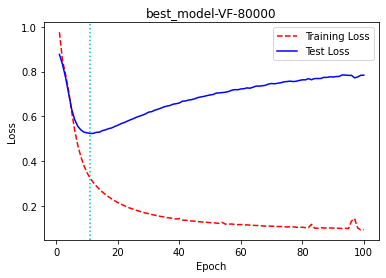

In [10]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model
    
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF-80000.txt', 'dataset/english-spanish-train-VF-80000.txt','dataset/english-spanish-test-VF-80000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='best_model-VF-80000.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='best_model-VF-80000.npy'
best_model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(best_model,loss_func,learning_rate)
plot_model(best_model, to_file='best_model-VF-80000.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, best_model, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(best_model.history, 'best_model-VF-80000.png', 'best_model-VF-80000')

In [ ]:
# empezo 9:24 - 20:48 --> 16 epochs
--> 9:51 --> epoch 34
--> 10:17 -->epoch 35
--> 12:55 -->epoch 38
--> 23:16 --> epoch 51
    next day
--> 11:45 epoch 68

In [40]:
from fit_model import *
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model
    
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF.txt', 'dataset/english-spanish-train-VF.txt','dataset/english-spanish-test-VF.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/best_model-VF.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/best_model-VF.npy'
best_model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(best_model,loss_func,learning_rate)
plot_model(best_model, to_file='model_images/best_model-VF.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, best_model, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(best_model.history, 'loss_vs_epochs_images/best_model-VF.png', 'best_model-VF')

12066 22997 42 44
(80000, 42) (80000, 44) (20000, 42) (20000, 44)
(80000, 42) (80000, 44) (20000, 42) (20000, 44)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 42, 128)           1544448   
                                                                 
 bidirectional_14 (Bidirecti  (None, 256)              198144    
 onal)                                                           
                                                                 
 repeat_vector_7 (RepeatVect  (None, 44, 256)          0         
 or)                                                             
                                                                 
 bidirectional_15 (Bidirecti  (None, 44, 256)          296448    
 onal)                                                           
                                                                 
 time_

KeyboardInterrupt: 

In [ ]:
# empezo 12:25 , 8:25 ---> 7 epoch 

In [ ]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model
    
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-100000.txt', 'dataset/english-spanish-train-100000.txt','dataset/english-spanish-test-100000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/best_model-100000.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/best_model-100000.npy'
best_model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(best_model,loss_func,learning_rate)
plot_model(best_model, to_file='model_images/best_model-100000.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, best_model, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(best_model.history, 'loss_vs_epochs_images/best_model-100000.png', 'best_model-100000')

In [ ]:
# empeso 9:36 pm , primer epoch 11:30